In [146]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import sigmoid, linear, relu

In [148]:
data_set = pd.read_csv('train.csv')
X = data_set.drop('label', axis=1).to_numpy()
y = data_set['label'].to_numpy().reshape(-1,1)

In [150]:
print ('The first element of X is: ', X[0])

The first element of X is:  [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 188 255  94   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0 191 250 253
  93   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0 123 248 253 167  10   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  80 247 253
 208  13   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   

In [152]:
print ('The first element of y is: ', y[0,0])
print ('The last element of y is: ', y[-1,0])

The first element of y is:  1
The last element of y is:  9


In [154]:
print ('The shape of X is: ' + str(X.shape))
print ('The shape of y is: ' + str(y.shape))

The shape of X is: (42000, 784)
The shape of y is: (42000, 1)


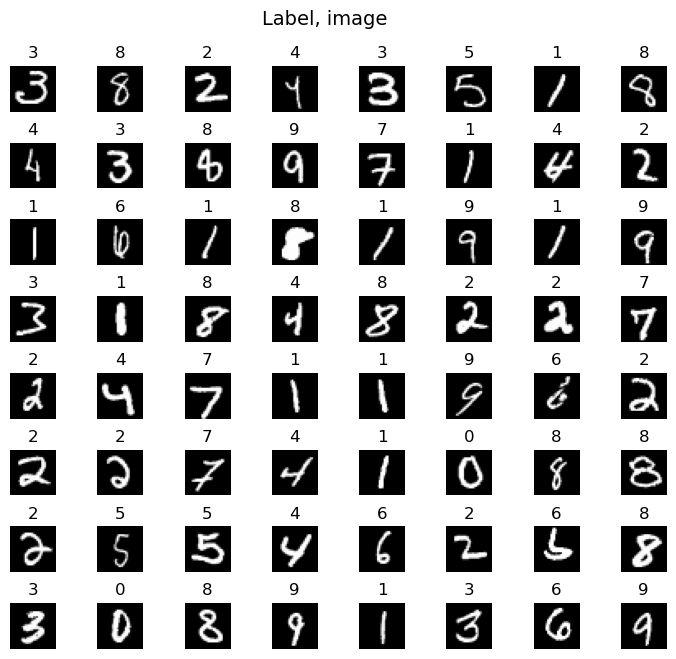

In [156]:
m, n = X.shape

fig, axes = plt.subplots(8,8, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    
    X_random_reshaped = X[random_index].reshape((28,28))
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    ax.set_title(y[random_index,0])
    ax.set_axis_off()
    fig.suptitle("Label, image", fontsize=14)

In [189]:
model = Sequential(
    [
        tf.keras.Input(shape=(784,)),
        Dense(units=50, activation='relu'),
        Dense(units=25, activation='relu'),
        Dense(units=15, activation='relu'),
        Dense(units=10, activation='linear')
    ], name = 'my_model'
)

In [191]:
model.summary()

Model: "my_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_45 (Dense)                │ (None, 50)             │        39,250 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_46 (Dense)                │ (None, 25)             │         1,275 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_47 (Dense)                │ (None, 15)             │           390 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_48 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 41,075 (160.45 KB)

 Trainable params: 41,075 (160.45 KB)

 Non-trainable params: 0 (0.00 B)

In [193]:
[layer1, layer2, layer3, layer4] = model.layers
W1,b1 = layer1.get_weights()
W2,b2 = layer2.get_weights()
W3,b3 = layer3.get_weights()
W4,b4 = layer4.get_weights()
print(f"W1 shape = {W1.shape}, b1 shape = {b1.shape}")
print(f"W2 shape = {W2.shape}, b2 shape = {b2.shape}")
print(f"W3 shape = {W3.shape}, b3 shape = {b3.shape}")
print(f"W4 shape = {W4.shape}, b4 shape = {b4.shape}")

W1 shape = (784, 50), b1 shape = (50,)
W2 shape = (50, 25), b2 shape = (25,)
W3 shape = (25, 15), b3 shape = (15,)
W4 shape = (15, 10), b4 shape = (10,)


In [195]:
model.compile(
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
)

history = model.fit(X, y, epochs=50)

Epoch 1/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 429us/step - loss: 3.4190
Epoch 2/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 413us/step - loss: 1.0434
Epoch 3/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 406us/step - loss: 0.5852
Epoch 4/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 409us/step - loss: 0.3740
Epoch 5/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 408us/step - loss: 0.2861
Epoch 6/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - loss: 0.2326
Epoch 7/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 448us/step - loss: 0.2028
Epoch 8/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - loss: 0.1864
Epoch 9/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 422us/step - loss: 0.1611
Epoch 10/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 424us/step - loss: 0.1395
Epoch 11/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 418us/step - loss: 0.1295
Epoch 12/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 417us/step - loss: 0.1245
Epoch 13/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 419us/step - loss: 0.1193
Epoch 14/50
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - loss: 0.1127
E

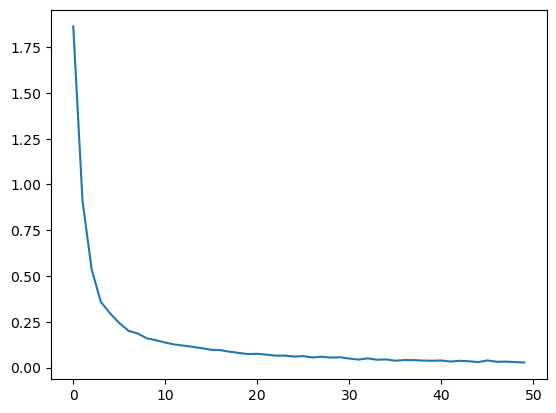

In [197]:
plt.plot(history.history['loss'])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
1

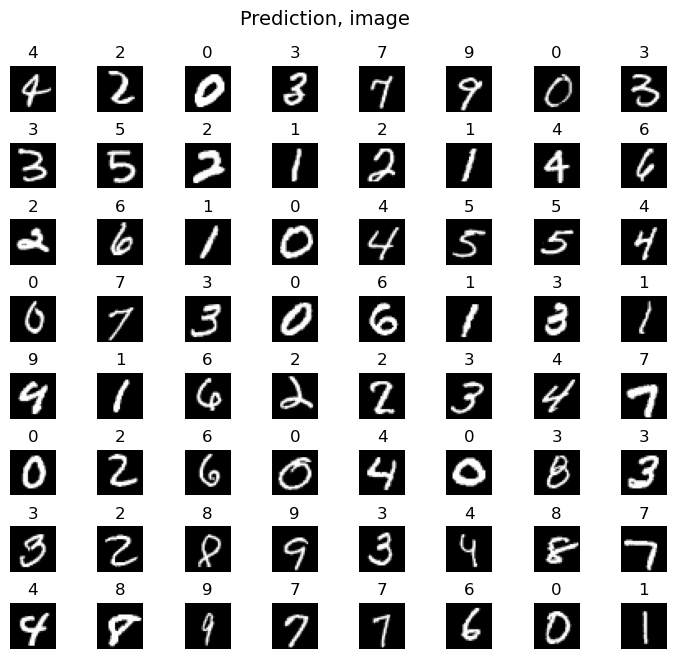

In [106]:
test_data = pd.read_csv('test.csv')
X_test = test_data.to_numpy()

m, n = X_test.shape

fig, axes = plt.subplots(8,8, figsize=(7,7))
fig.tight_layout(pad=0.13,rect=[0, 0.03, 1, 0.91])

for i,ax in enumerate(axes.flat):
    random_index = np.random.randint(m)
    y_pred = model.predict(X_test[random_index].reshape(1,784)).argmax()
    X_random_reshaped = X_test[random_index].reshape((28,28))
    
    ax.imshow(X_random_reshaped, cmap='gray')
    
    # Display the label above the image
    ax.set_title(y_pred)
    ax.set_axis_off()
    fig.suptitle("Prediction, image", fontsize=14)